## Imports and Installations

In [1]:
#%pip install numpy scipy pandas matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

Initial definitions taken from: https://www.quantstart.com/articles/vasicek-model-simulation-with-python/

In [3]:
def vasicek_model(theta, mu, sigma, r0, T, dt):
    """
    Simulate the Vasicek model using the Euler-Maruyama method.

    Parameters
    ----------
    theta : `float`
        The speed of mean reversion
    mu : `float`
        The long-term mean level
    sigma : `float`
        The volatility of the random aspect
    r0 : `float`
        The initial interest rate
    T : `float`
        The total time horizon
    dt : `float`
        The time step size

    Returns
    -------
    `np.ndarray`
        The array of simulated interest rates over time
    """
    N = int(T / dt)  # Number of time steps
    rates = np.zeros(N)  # Pre-allocate an array large enough for the sample path
    rates[0] = r0  # Set the initial rate

    for t in range(1, N):  # Skip the initial rate (start at 1, not 0)
        dr = theta * (mu - rates[t - 1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
        rates[t] = rates[t - 1] + dr
    return rates

In [4]:
def simulate_vasicek_paths(theta, mu, sigma, r0, T, dt, num_simulations):
    """
    Simulate multiple interest rate paths using the Vasicek model.

    Parameters
    ----------
    theta : `float`
        The speed of mean reversion
    mu : `float`
        The long-term mean level
    sigma : `float`
        The volatility of the random aspect
    r0 : `float`
        The initial interest rate
    T : `float`
        The total time horizon
    dt : `float`
        The time step size
    num_simulations : `int`
        The number of Monte Carlo simulations to run

    Returns
    -------
    `pd.DataFrame`
        The Pandas DataFrame containing simulated interest rate paths
    """
    N = int(T / dt)  # Number of time steps
    all_simulations = np.zeros((N, num_simulations))  # Pre-allocate the two-dimensional array of multiple paths
    
    for i in range(num_simulations):
        all_simulations[:, i] = vasicek_model(theta, mu, sigma, r0, T, dt)
    
    return pd.DataFrame(
        all_simulations,
        columns=[f'Simulation {i+1}' for i in range(num_simulations)]
    )

In [5]:
def plot_vasicek_paths(df, T, dt):
    """
    Visualize simulated interest rate paths.

    Parameters
    ----------
    df : `pd.DataFrame`
        The Pandas DataFrame containing simulated paths
    T : `float`
        The total time horizon
    dt : `float`
        The time step size

    Returns
    -------
    None
    """
    plt.figure(figsize=(12, 6))
    time_points = np.linspace(0, T, int(T / dt))

    for column in df.columns:
        plt.plot(time_points, df[column], lw=1.0, alpha=0.6)

    plt.title('Simulated Vasicek Interest Rate Paths')
    plt.xlabel('Time')
    plt.xlim(0.0, 1.0)
    plt.ylabel('Interest Rate')
    plt.show()

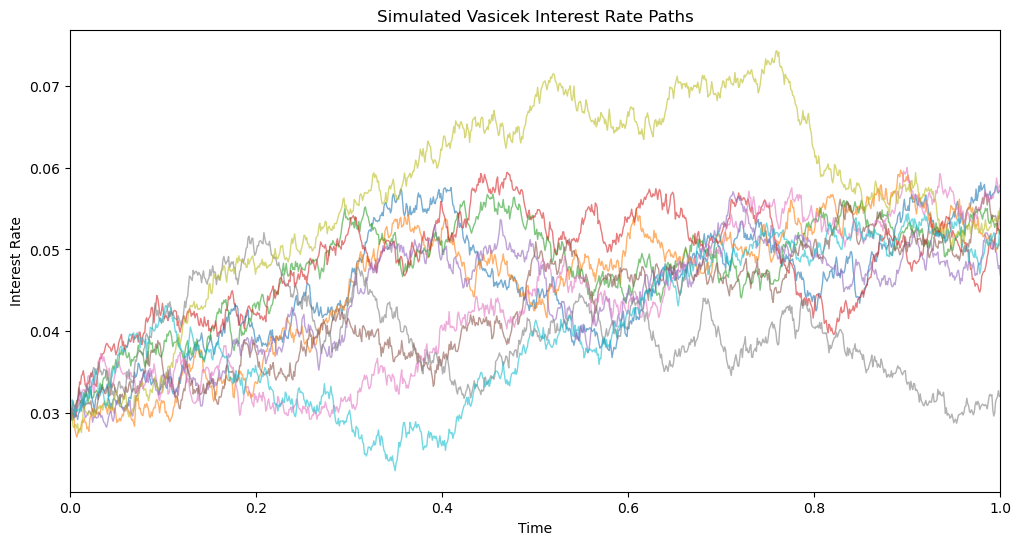

In [7]:
if __name__ == "__main__":
    theta = 2.0  # Speed of mean reversion
    mu = 0.05  # Long-term mean interest rate
    sigma = 0.02  # Volatility of the random component
    r0 = 0.03  # Initial value of the interest rate
    T = 1.0  # Time horizon (1 year)
    dt = 0.001  # Time step size
    num_simulations = 10  # Number of sample paths to generate

    # Simulate the paths
    simulated_paths = simulate_vasicek_paths(theta, mu, sigma, r0, T, dt, num_simulations)
    
    # Plot the results
    plot_vasicek_paths(simulated_paths, T, dt)